# Delhi Weather Analysis And Temperature Prediction

##### Weather analysis and Temperature prediction is a very important part that needs to be taken control of for a better understanding of our environment and proper prediction, which can greatly help industries like agriculture and many others for a more informed and effective decision making.

### Importing

#### Step 1: Import basic required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Step 2: Read the dataset and inspect it.

In [2]:
df = pd.read_csv('F:/DataSets/DelhiWeatherDataSet/testset.csv', index_col='datetime_utc', parse_dates=['datetime_utc'])

In [3]:
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


### Feature Engineering

#### Step 3: Transform the data into useful format.

##### We first plot the most important columns based on our previous knowledge as human beings so as to get an understanding of patterns.

In [4]:
weather_df = df.loc[:,[' _conds', ' _hum', ' _tempm', '_pressurem', '_dewptm']]
weather_df = weather_df.rename(index=str, columns={' _conds': 'condition', ' _hum': 'humidity', ' _pressurem': 'pressure', ' _tempm': 'temperature', '_dewptm': 'dew'})
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


dataset shape (rows, columns) - (100990, 5)


,condition,humidity,temperature,_pressurem,dew
datetime_utc,,,,,
1996-11-01 11:00:00,Smoke,27.0,30.0,NaN,NaN
1996-11-01 12:00:00,Smoke,32.0,28.0,NaN,NaN
1996-11-01 13:00:00,Smoke,44.0,24.0,NaN,NaN
1996-11-01 14:00:00,Smoke,41.0,24.0,NaN,NaN
1996-11-01 16:00:00,Smoke,47.0,23.0,NaN,NaN


##### We find number of rows with no values in each column and remove the columns that have more than 70% of values as NaN.

In [5]:
weather_df.isnull().sum()

condition          72
humidity          757
temperature       673
_pressurem     100990
dew            100990
dtype: int64

In [6]:
weather_df.count()

condition      100918
humidity       100233
temperature    100317
_pressurem          0
dew                 0
dtype: int64

##### Since we have no values available in pressure and dew, we remove the columns.

In [7]:
weather_df.drop(['_pressurem', 'dew'], axis=1, inplace=True)

##### Now we plot the percentage of missing values for a better insight.

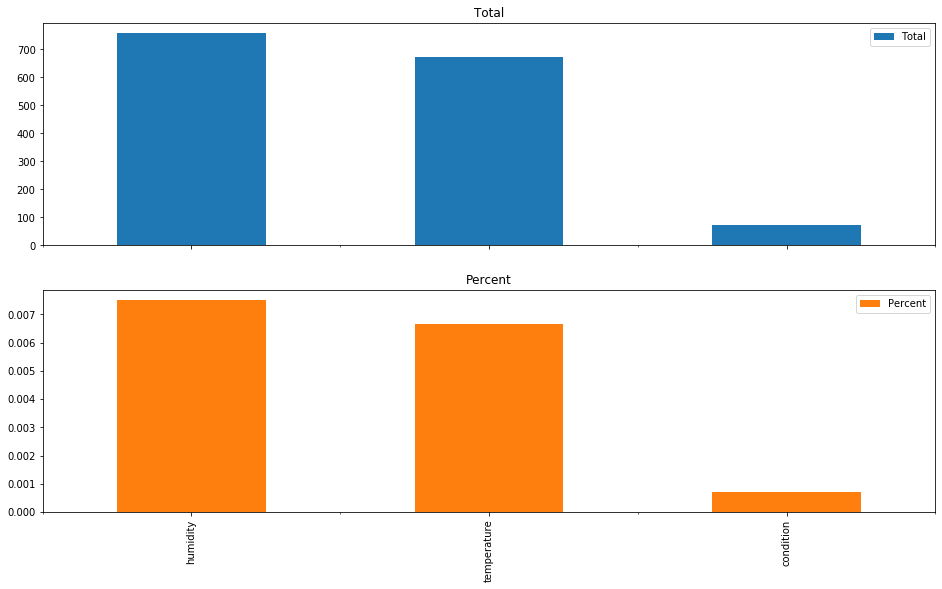

In [8]:
def list_and_visualize_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]
    
    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(weather_df)

##### As we can see, no column has more than 0.8% of values missing and thus we have a good dataset.
##### To handle missing data, we head over to the Missing Data Handling section.

### Data Cleansing

#### Step 4: Handling Missing Data

##### We handle missing data by replacing the missing value with the previous valid value.

In [9]:
weather_df.ffill(inplace=True)
weather_df[weather_df.isnull()].count()

condition      0
humidity       0
temperature    0
dtype: int64

##### Now we have no missing data. Thus, now we will inspect our data using the describe functionality.

In [10]:
weather_df.describe()

,humidity,temperature
count,100990.000000,100990.000000
mean,57.957422,25.438222
std,23.821218,8.487994
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,243.000000,90.000000


##### As we can see, maximum temperature in indicated as 90 and maximum humidity as 243 which are very unrealistic values, thus, based on realistic values which we know, we will ignore any row having temperature >= 55 and humidity > 100.

In [11]:
weather_df = weather_df[weather_df.temperature < 55]
weather_df = weather_df[weather_df.humidity <= 100]
weather_df.describe()

,humidity,temperature
count,100983.000000,100983.000000
mean,57.955309,25.436361
std,23.805467,8.482944
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,100.000000,47.000000


##### Now we can proceed with our process of analysis.

### Exploratory Data Analysis and Visualization

#### Step 5: Find most common weather types in Delhi.

Text(0, 0.5, 'Percent')

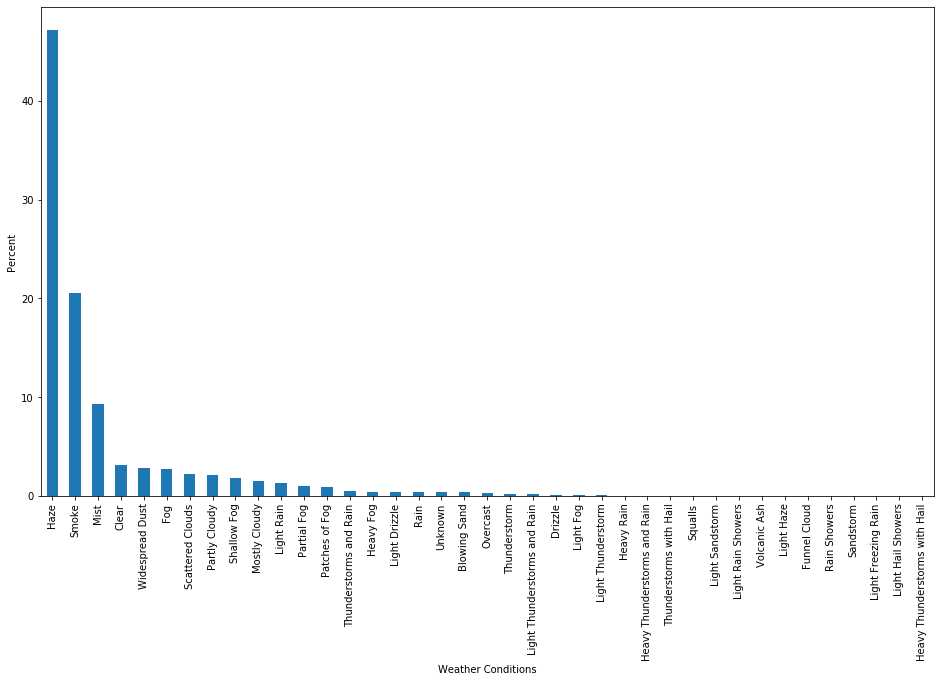

In [12]:
weather_condition = (weather_df.condition.value_counts()/(weather_df.condition.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

##### We can see that Delhi mostly has a Hazy or Smoky weather which are clear indications of the high levels of pollution in the city.

##### Now we see how temperature and humidity change over time in Delhi.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F4E380B38>,
      dtype=object)

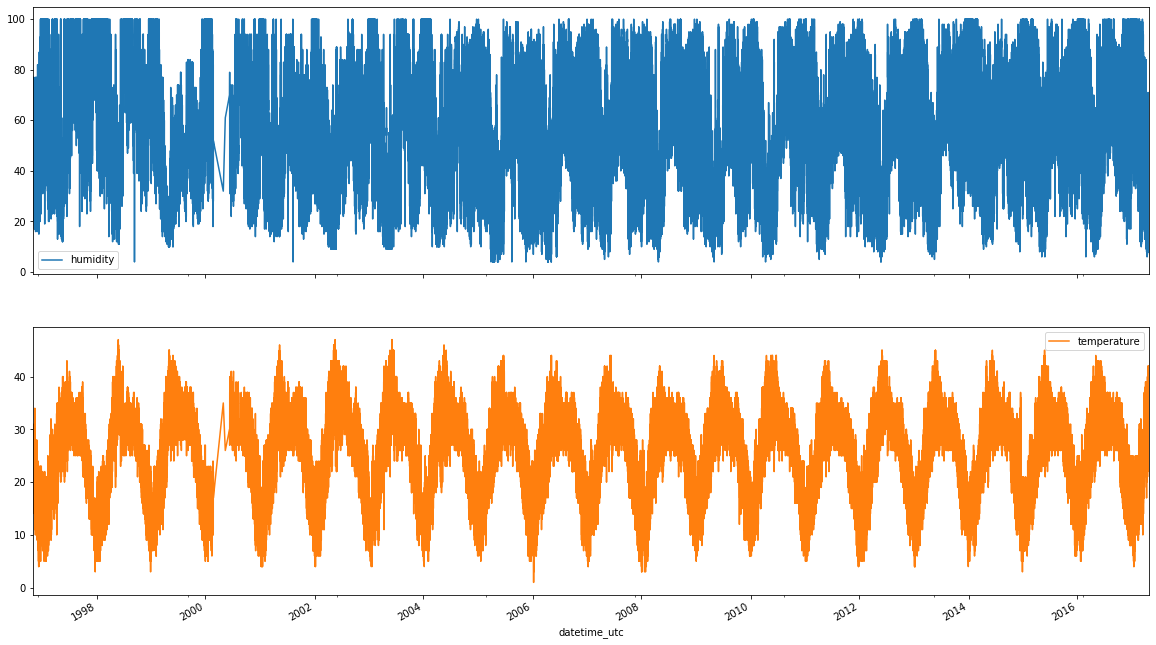

In [24]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.plot(subplots=True, figsize=(20,12))

##### As we can clearly see than a trend is being followed every year, thus, to get a better insight, we plot only 2 years data(recent years 2015 and 2016).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F4ECA7BE0>,
      dtype=object)

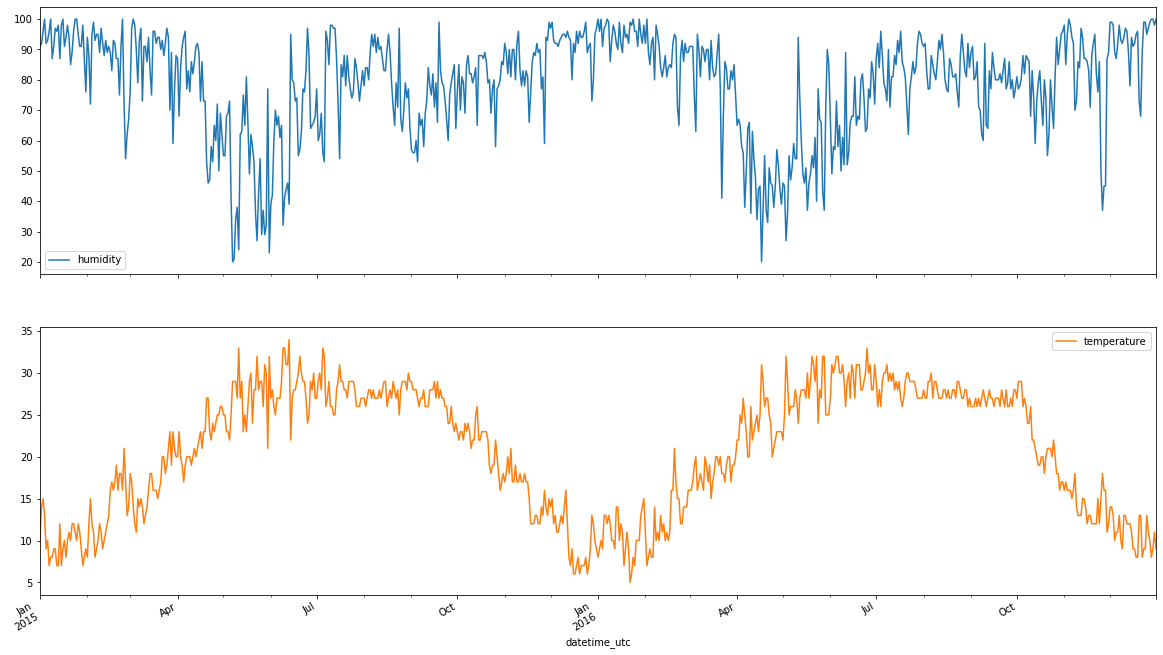

In [23]:
weather_df['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

##### From the above 2 plots, we can infer that temperature is higher during the middle 2 quarters of the year compared to first and last quarter of the year.
##### Also humidity is at its peak at the beginning of the year, it slowly falls down to its lowest towards the mid of the year and then rises back up to its highest towards the end.

##### Now we get our data ready for the model that needs to be trained and tested and then used for predicting Temperature.

In [40]:
df_train = weather_df['2000':'2015'].resample('M').mean().fillna(method='pad')
df_train.drop(columns='humidity', axis=1, inplace=True)
df_test = weather_df['2016':'2017'].resample('M').mean().fillna(method='pad')
df_test.drop(columns='humidity', axis=1, inplace=True)

### Check Stationarity

##### We can confirm that our data has a seasonality factor to it. Now we will need to confirm following things for furthur process:
1. Constant Mean
2. Constant Variancce
3. Time independent Auto-Covariance

#### First we check rolling mean and rolling standard deviation and perform Augmented Dicky-Fuller test
We need only test_statistic and critical value from Dicky-Fuller test to know the stationarity of the data.

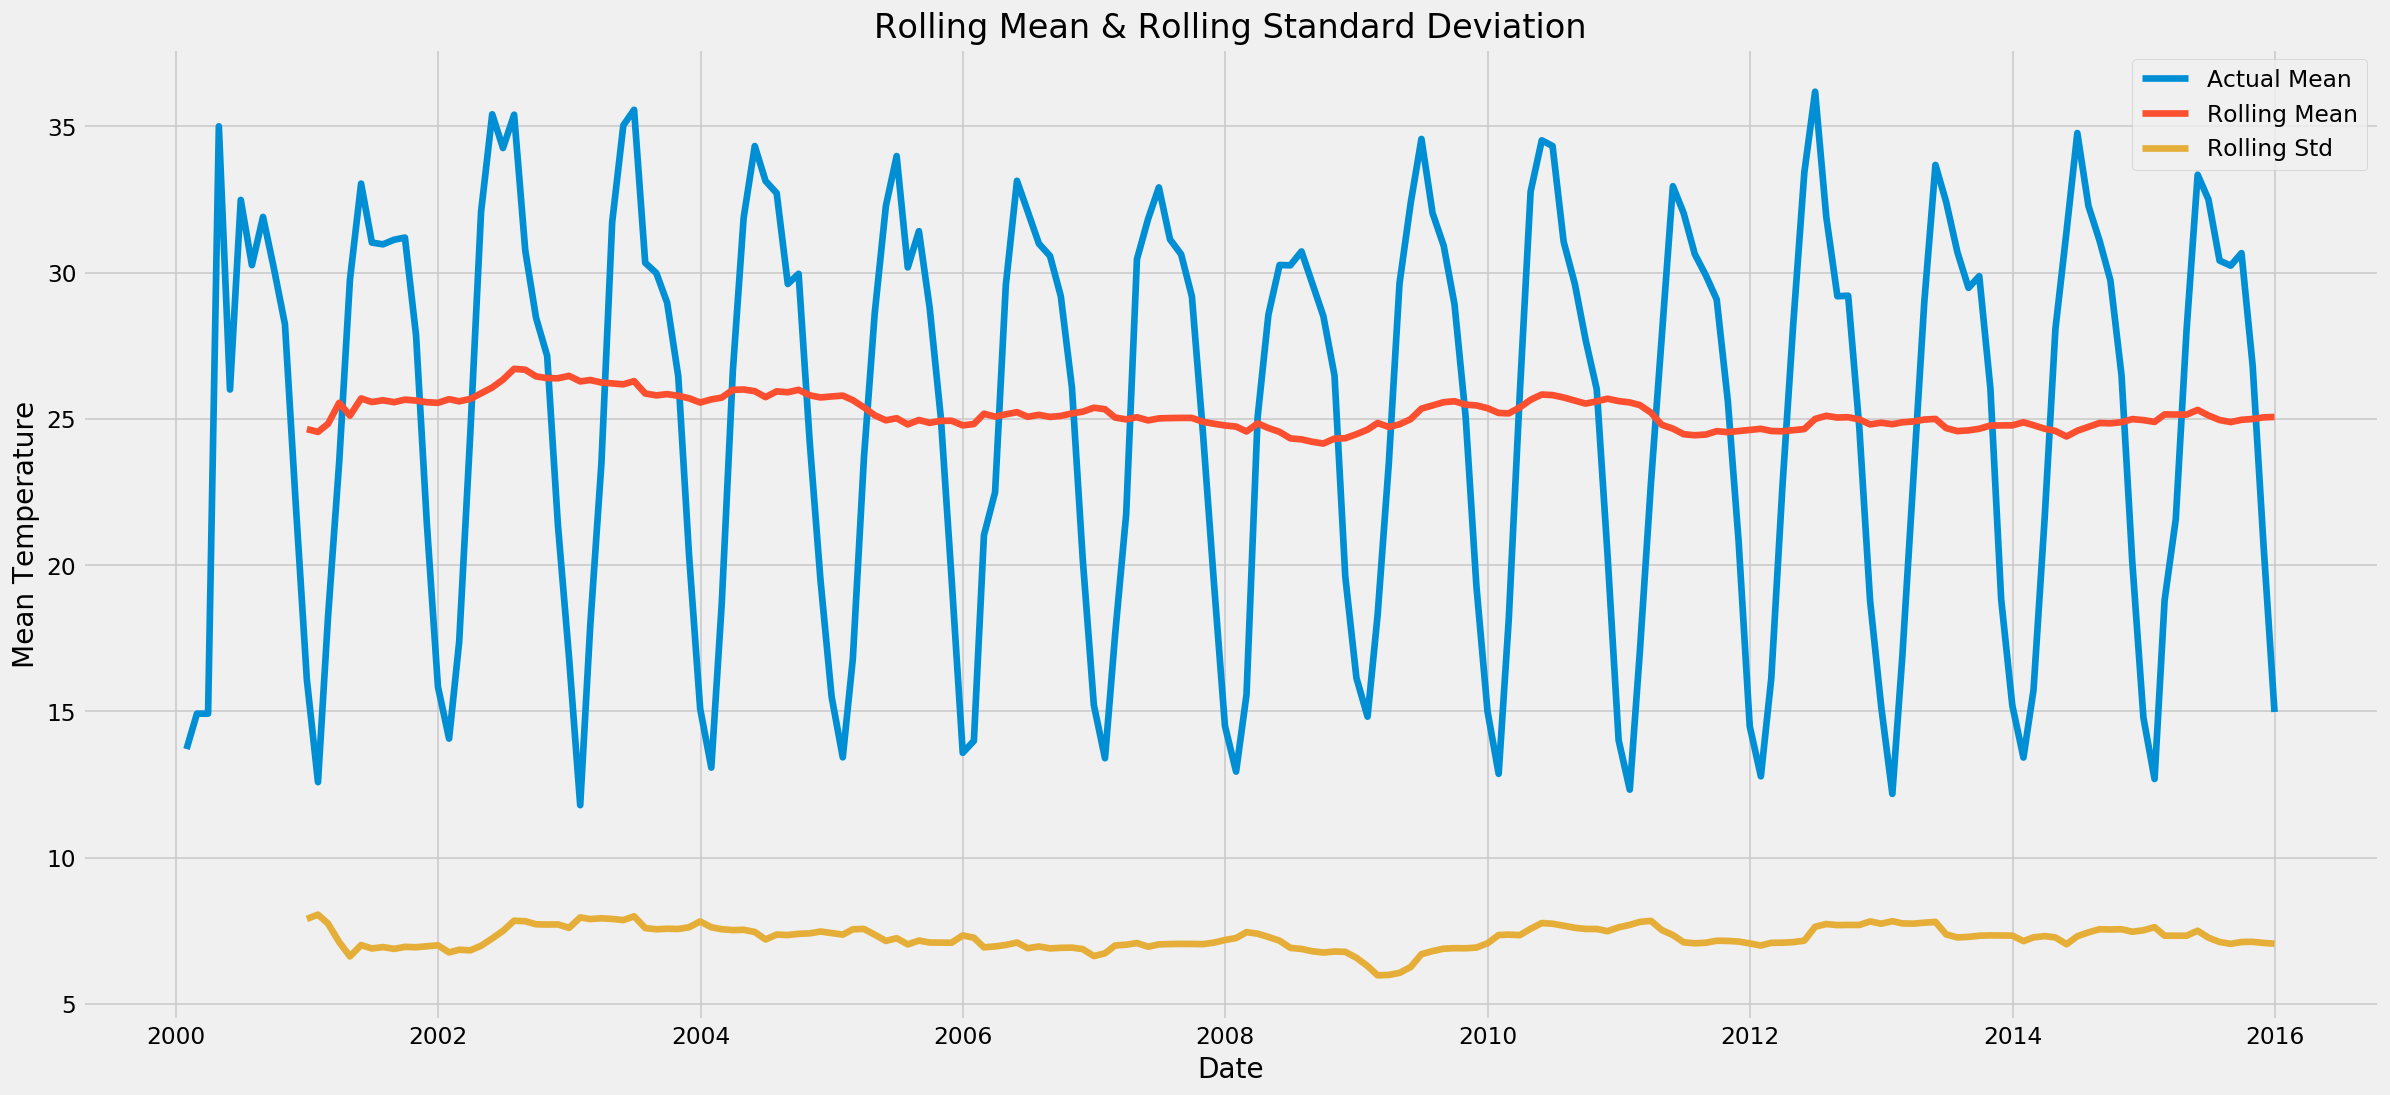

Test statistic:  -2.126995250298034
Critical Values: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


In [41]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])
    
plot_rolling_mean_std(df_train.temperature)
perform_dickey_fuller_test(df_train.temperature)

From the above graphs, we can see that the mean and variance is almost stationary.
And we can also see that the test statistic value is larger than critical values, thus, 'd' value becomes 0 in ARIMA model.

Considering a case if it was non-stationary, in that case we would use below techniques to make it stationary.

For non-stationary to stationary conversion, we can use any of the below technique :

1. Decomposing
2. Differencing

Here, we are preferring Differencing because it is very straight forward. We would use below correlation plots to identify the order of differencing.

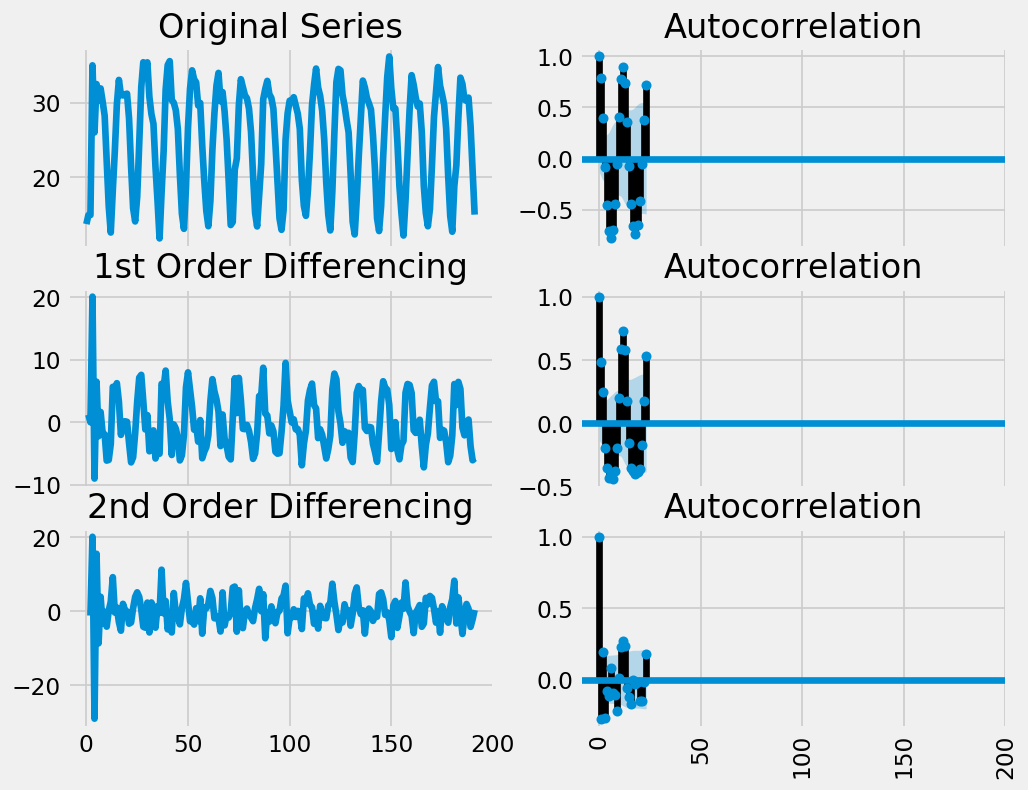

In [42]:
import seaborn as sns
plt.style.use('fivethirtyeight')

# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_train.values); 
axes[0, 0].set_title('Original Series')
plot_acf(df_train.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_train.temperature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_train.diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_train.temperature.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_train.diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

As we can see here, the first series itself is perfectly stationary. So we don't need any differencing here.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


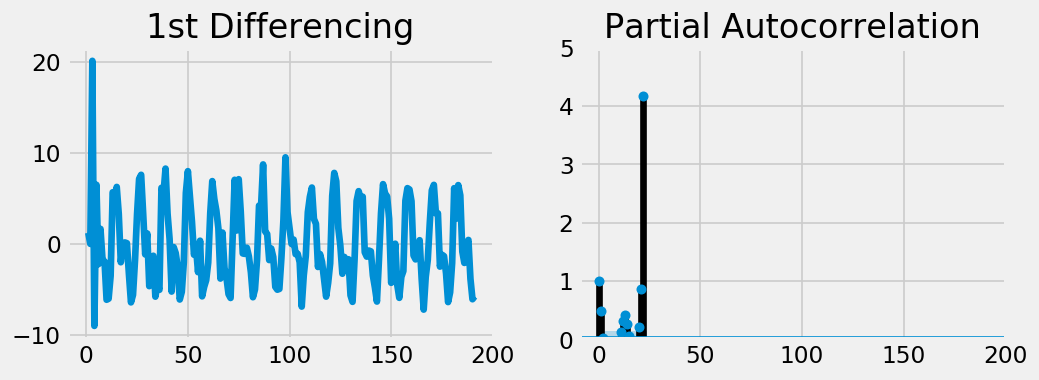

In [43]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_train.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_train.diff().dropna().values, ax=axes[1])

plt.show()

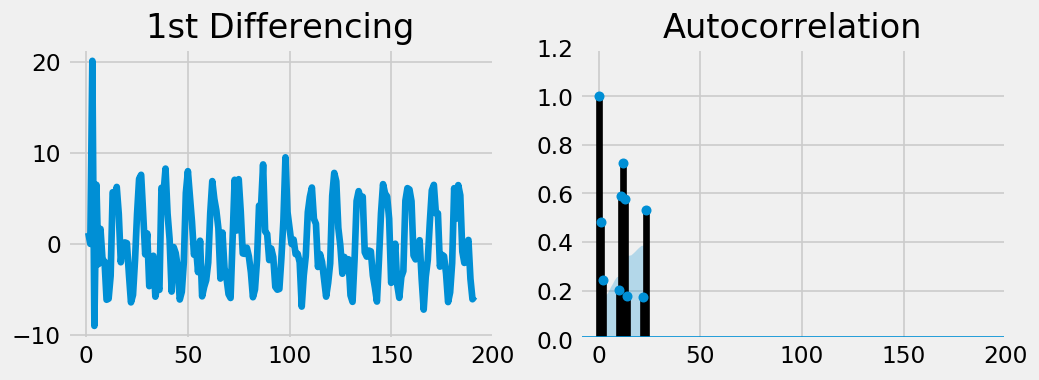

In [45]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_train.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_train.diff().dropna().values, ax=axes[1])

plt.show()

### ARIMA Model Deployment

<strong>Timeseries Analysis (ARIMA Model)</strong>

For prediction we are going to use one of the most popular model for time series, Autoregressive Integrated Moving Average (ARIMA) which is a standard statistical model for time series forecast and analysis. An ARIMA model can be understood by outlining each of its components as follows:

Autoregression (AR) - refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.
The notation AR(p) indicates an autoregressive model of order p.

Example — If p is 3 the predictor for X(t) will be

  <strong>X(t) = µ + X(t-1) + X(t-2) + X(t-3) + εt</strong>

Where ε is error term.

Integrated (I) - represents the differencing of raw observations to allow for the time series to become stationary, i.e., data values are replaced by the difference between the data values and the previous values.
Moving average (MA) - incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Example — If q is 3 the predictor for X(t) will be

  <strong>X(t) = µ + εt + θ1.ε(t-1) + θ2.ε(t-2) + θ3.ε(t-3)</strong>
  
Here instead of difference from previous term, we take errer term (ε) obtained from the difference from past term Now we need to figure out the values of p and q which are parameters of ARIMA model. We use below two methods to figure out these values -

Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

Partial Autocorrelation Function (PACF): is used to measure the degree of association between X(t) and X(t-p).

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


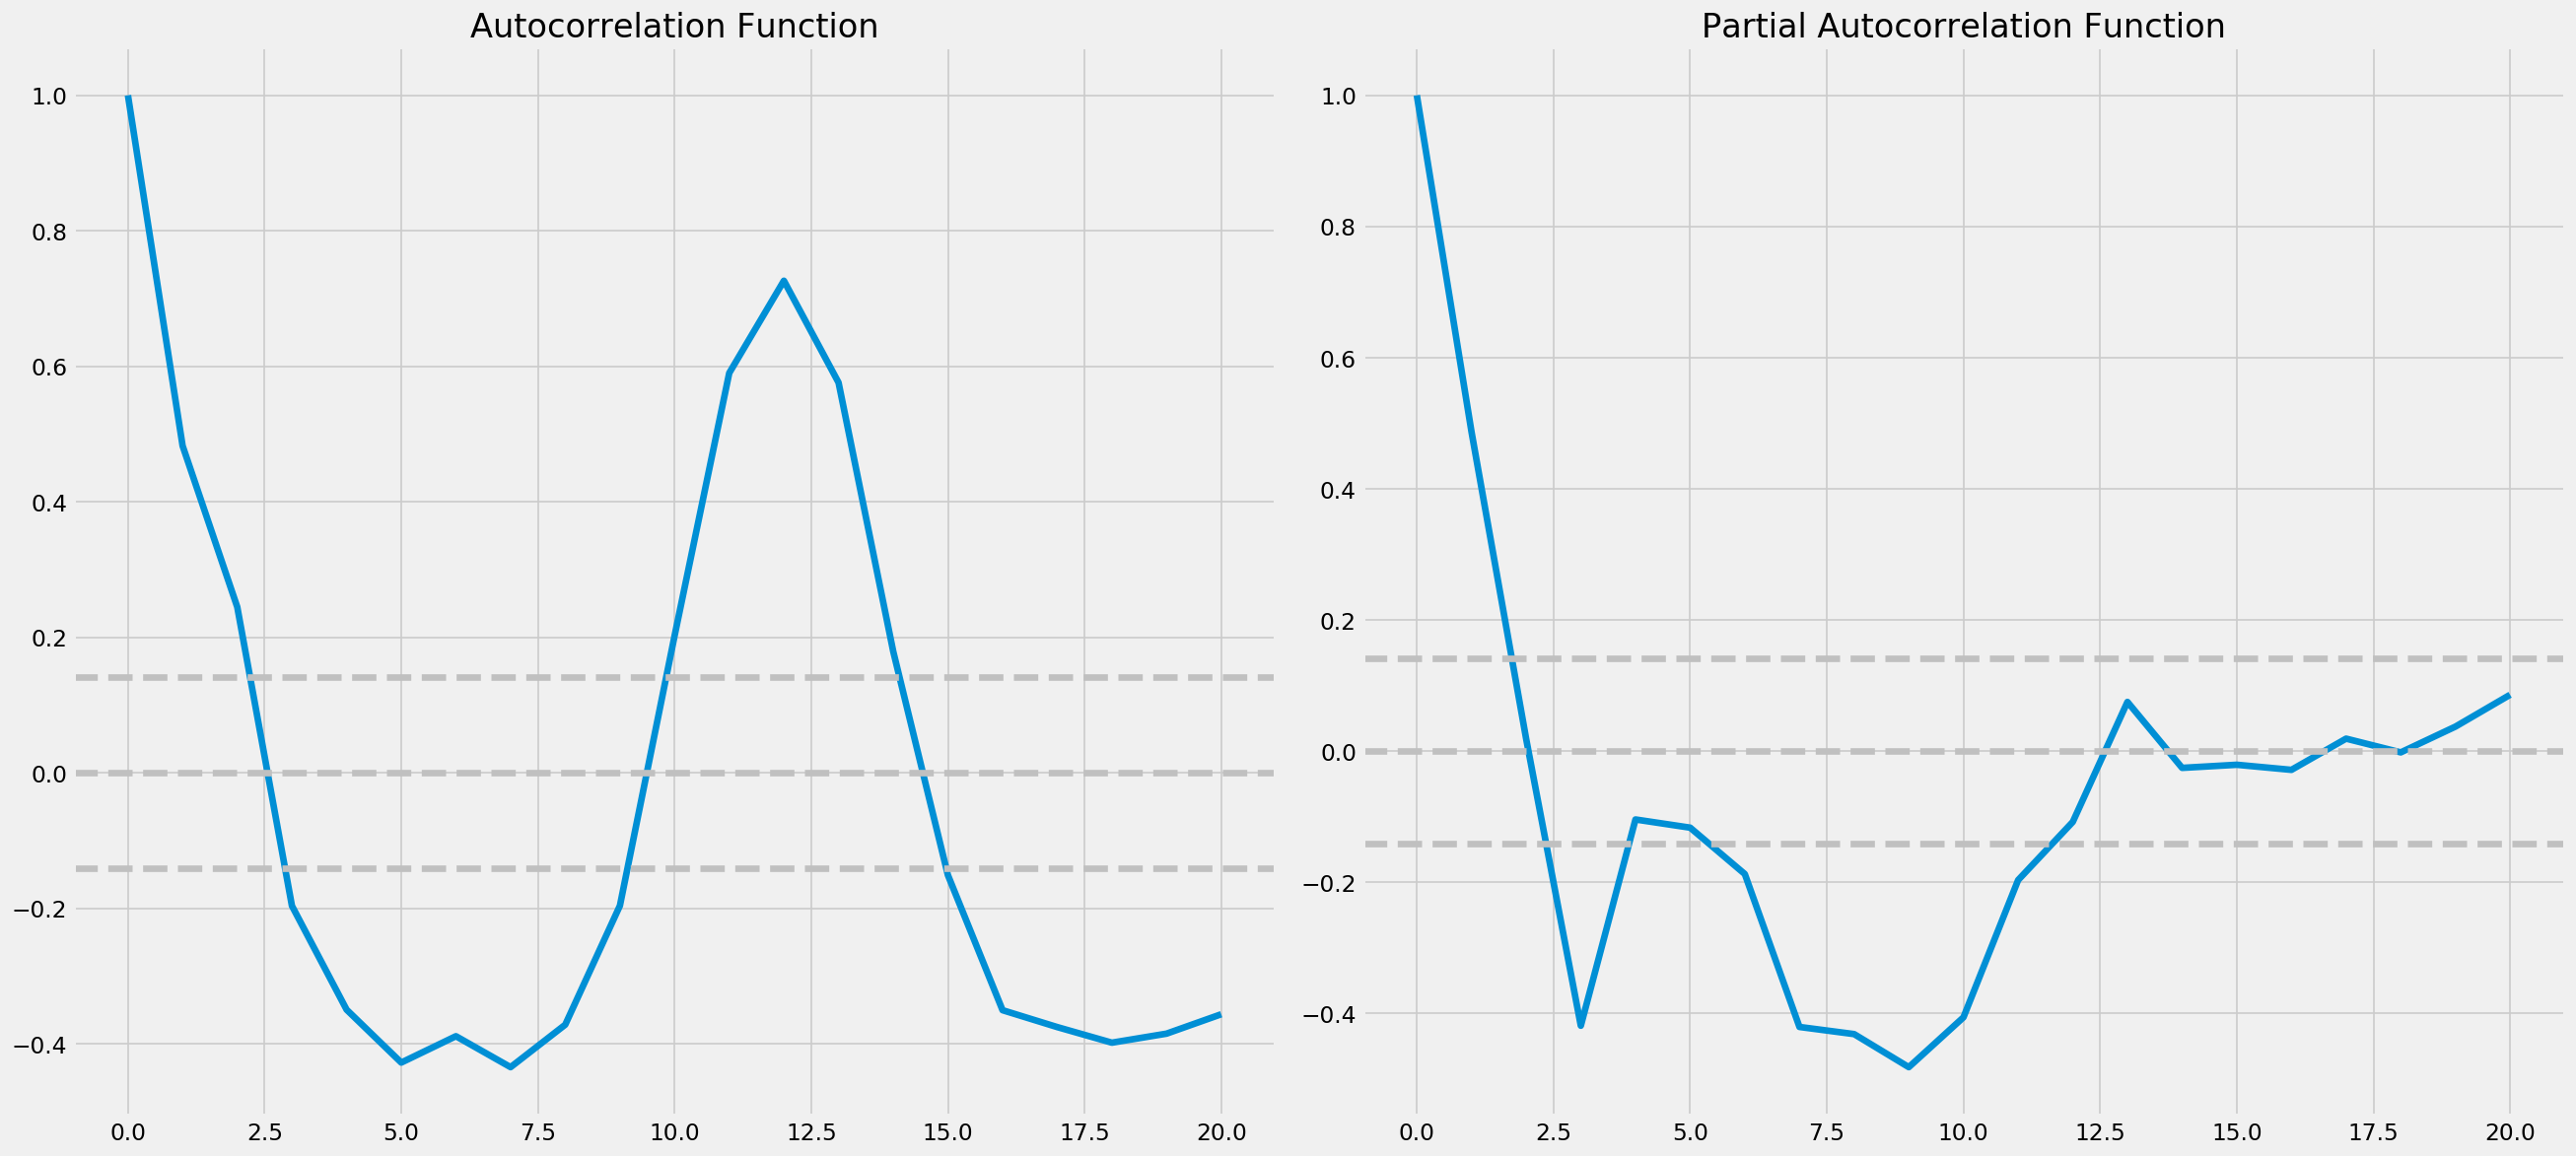

In [46]:
acf_lag = acf(df_train.diff().dropna().values, nlags=20)
pacf_lag = pacf(df_train.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df_train.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df_train.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df_train.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df_train.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

These grey dotted line are confidence intervals which we are going to use to find out the value of p and q.

p - the point where PACF crosses the upper confidence  level. In our case it seems to be 2. So we will take p = 2.

q - the point where ACF crosses the upper confidence  level. In our case it seems to be 2. So we will take q = 2.

d - number of nonseasonal differences needed for stationarity. In this case we are going to take it as 0, since this series is already stationary.

##### Now we are going fit time series for ARIMA Models. We will compare performance on the basis of RSS score and at last prefer the best one.

In [47]:
model = ARIMA(df_train.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  192
Model:                     ARMA(2, 2)   Log Likelihood                -454.355
Method:                       css-mle   S.D. of innovations              2.552
Date:                Mon, 29 Jun 2020   AIC                            920.709
Time:                        22:12:50   BIC                            940.254
Sample:                             0   HQIC                           928.625
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1917      0.119    211.045      0.000      24.958      25.426
ar.L1.y        1.6785      0.024     69.834      0.000       1.631       1.726
ar.L2.y       -0.9519      0.023    -41.163      0.0

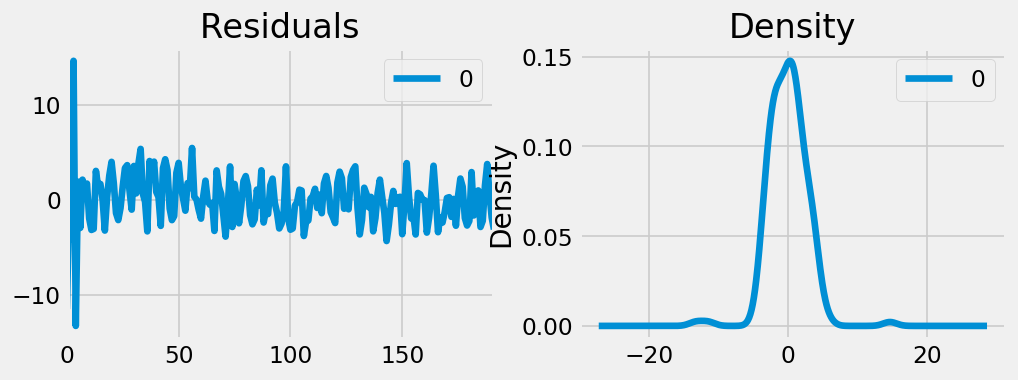

In [48]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### Predicting Temperatures Example

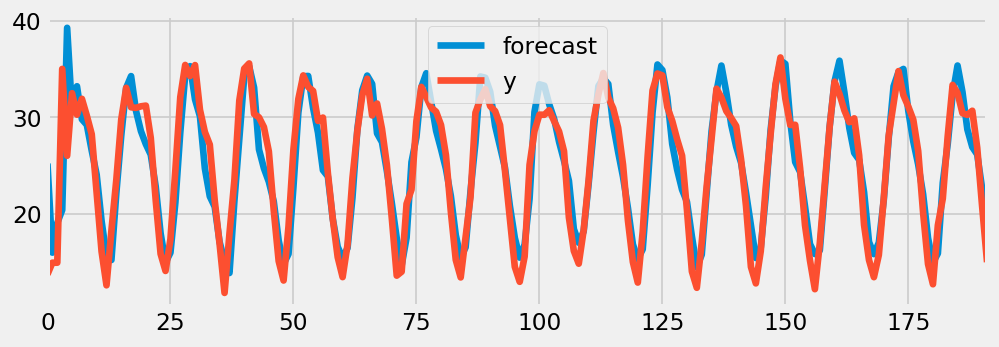

In [49]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

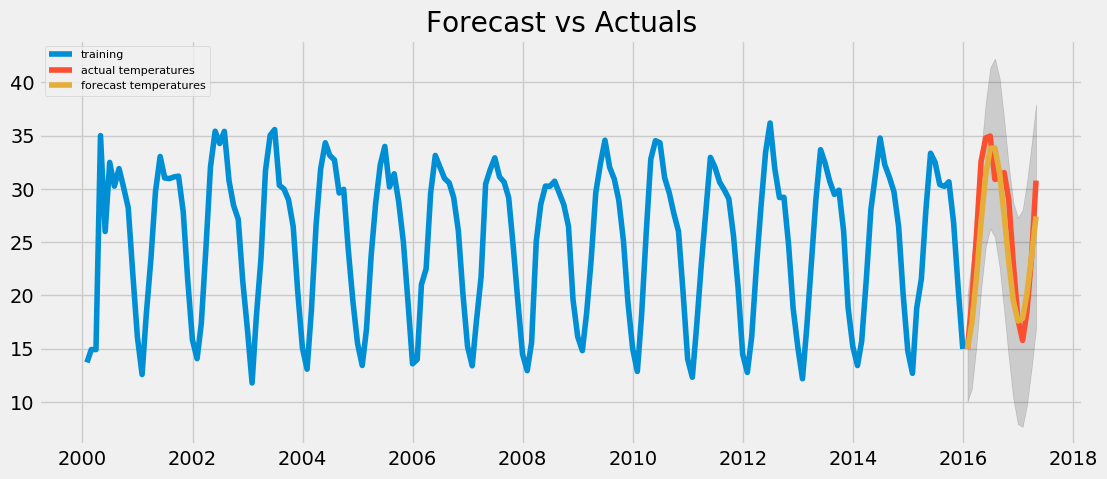

In [59]:
fc, se, conf = model_fit.forecast(16, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual temperatures')
plt.plot(fc_series, label='forecast temperatures')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# test_df.index